In [1]:
import pandas as pd

In [2]:
from usms_seed.data import extract, transforms, clean

In [3]:
extract.find_meet_results('../data')

['../data/meets_10to20_results.csv', '../data/meet_results.csv']

In [4]:
df_results = extract.combine_csv_files(extract.find_meet_results('../data'))
df_meet_list = extract.combine_csv_files(extract.find_meet_list('../data'))

In [5]:
df_results['final_time_s'] = df_results['final_time'].apply(transforms.convert_to_seconds)

In [6]:
df_results = clean.filter_na_or_none(df_results)

In [7]:
df_results = transforms.convert_strings_to_ints(df_results, ['age'])

In [8]:
df_results = clean.filter_bad_ages(df_results)

In [22]:
df_results[df_results.name.str.match(r'^\d')].head(100)

,name,age,event_name,club,seed_time,final_time,gender,stroke_type,distance,unit,meet_list_uuid,final_time_s
15230,"2McSpadden, Brian",2,Men 18-24 50 Yard Freestyle Finals,DARR,28.00,28.55,Men,Freestyle,50.0,Yards,6f9efc49-87d4-429a-9e9b-2a58ad88088d,28.55
15231,"2McSpadden, Brian",2,Men 18-24 100 Yard Freestyle Finals,DARR,1:03.00,1:03.48,Men,Freestyle,100.0,Yards,6f9efc49-87d4-429a-9e9b-2a58ad88088d,63.48
15232,"2McSpadden, Brian",2,Men 18-24 100 Yard Backstroke Finals,DARR,1:16.80,1:23.52,Men,Backstroke,100.0,Yards,6f9efc49-87d4-429a-9e9b-2a58ad88088d,83.52
15233,"2McSpadden, Brian",2,Men 18-24 100 Yard Breaststroke Finals,DARR,1:18.00,1:27.29,Men,Breaststroke,100.0,Yards,6f9efc49-87d4-429a-9e9b-2a58ad88088d,87.29
308814,"0Schenck, Alan",6,Men 18-24 50 Yard Freestyle Finals,CLAR,42.60,43.63,Men,Freestyle,50.0,Yards,fe3cd2c4-603f-4e8a-b87e-5e9d563cb910,43.63
308815,"0Schenck, Alan",6,Men 18-24 50 Yard Backstroke Finals,CLAR,48.60,1:09.84,Men,Backstroke,50.0,Yards,fe3cd2c4-603f-4e8a-b87e-5e9d563cb910,69.84
308816,"0Schenck, Alan",6,Men 18-24 100 Yard Backstroke Finals,CLAR,1:56.60,2:25.43,Men,Backstroke,100.0,Yards,fe3cd2c4-603f-4e8a-b87e-5e9d563cb910,145.43
308817,"0Schenck, Alan",6,Men 18-24 200 Yard Backstroke Finals,CLAR,4:26.60,5:20.47,Men,Backstroke,200.0,Yards,fe3cd2c4-603f-4e8a-b87e-5e9d563cb910,320.47
308818,"0Schenck, Alan",6,Men 18-24 50 Yard Breaststroke Finals,CLAR,52.60,1:10.84,Men,Breaststroke,50.0,Yards,fe3cd2c4-603f-4e8a-b87e-5e9d563cb910,70.84
308819,"0Schenck, Alan",6,Men 18-24 100 Yard Breaststroke Finals,CLAR,2:06.60,2:34.51,Men,Breaststroke,100.0,Yards,fe3cd2c4-603f-4e8a-b87e-5e9d563cb910,154.51


In [9]:
df_mean = transforms.compute_mean_final_time(df_results)

In [10]:
df_results.shape

(447169, 12)

In [11]:
df_mean.shape

(347577, 9)

In [12]:
df_mean.head(100)

,name,age,gender,distance,unit,stroke_type,mean_final_time_s,std_final_time_s,number_of_swims
0,"0Schenck, Alan",6,Men,50.0,Yards,Backstroke,69.84,NaN,1
1,"0Schenck, Alan",6,Men,50.0,Yards,Breaststroke,70.84,NaN,1
2,"0Schenck, Alan",6,Men,50.0,Yards,Butterfly,54.39,NaN,1
3,"0Schenck, Alan",6,Men,50.0,Yards,Freestyle,43.63,NaN,1
4,"0Schenck, Alan",6,Men,100.0,Yards,Backstroke,145.43,NaN,1
...,...,...,...,...,...,...,...,...,...
95,"ARSLANIAN, BARKEV",30,Men,100.0,Yards,Individual Medley,72.72,NaN,1
96,"Aaberg, Jackson H",26,Men,50.0,Yards,Breaststroke,33.55,NaN,1
97,"Aaberg, Jackson H",26,Men,50.0,Yards,Freestyle,24.94,NaN,1
98,"Aaberg, Jackson H",26,Men,100.0,Yards,Freestyle,55.99,NaN,1


In [13]:
df_mean[(df_mean.number_of_swims > 1) & (df_mean.distance > 30)].sort_values('mean_final_time_s').head(100)

,name,age,gender,distance,unit,stroke_type,mean_final_time_s,std_final_time_s,number_of_swims
211753,"Modrov, Drew",28,Men,50.0,Yards,Freestyle,20.025000,0.233345,2
183628,"Long, John S",30,Men,50.0,Yards,Freestyle,20.125000,0.035355,2
236800,"Pereiro Carril, Oscar",26,Men,50.0,Yards,Freestyle,20.205000,0.233345,2
103652,"Garnier, Jeff",25,Men,50.0,Yards,Freestyle,20.525000,0.318198,2
264998,"Rybin, Roman",27,Men,50.0,Yards,Freestyle,20.605000,0.374767,2
...,...,...,...,...,...,...,...,...,...
13554,"Barcinas, Ken A",25,Men,50.0,Yards,Freestyle,22.010000,0.098995,2
277488,"Semenov, Nikita",25,Men,50.0,Yards,Freestyle,22.020000,0.311127,2
236822,"Perey, Trevor J",22,Men,50.0,Yards,Freestyle,22.023333,0.420278,3
288319,"Snyder, Dan",38,Men,50.0,Yards,Freestyle,22.030000,0.280535,5


In [14]:
df_mean.age.describe()

count    347577.000000
mean         49.614379
std          17.003753
min           2.000000
25%          36.000000
50%          51.000000
75%          62.000000
max          99.000000
Name: age, dtype: float64

In [15]:
df_mean[df_mean.age > 100]

,name,age,gender,distance,unit,stroke_type,mean_final_time_s,std_final_time_s,number_of_swims


In [19]:
swimmer_ages = df_mean.groupby('name').last().age

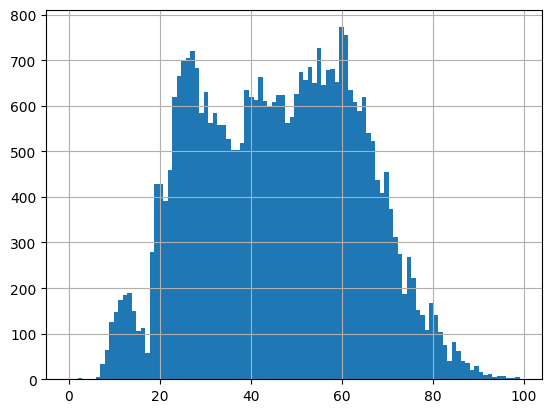

In [32]:
swimmer_ages.hist(bins=100, range=(0,99))

In [29]:
swimmer_ages[(swimmer_ages < 10) & (swimmer_ages >= 7)]

name
4Sheehan, James        7
Allen, Briana L        7
Allen, Brice D         9
Allen, Elizabeth M     7
Allen, Kaelyn J        7
                      ..
Wells, William T       8
Windham, Sophie        8
Wrona, Sophie M        9
Yancey, Hudson G       8
Ziegenfus, Steban D    8
Name: age, Length: 223, dtype: int64

<Axes: >

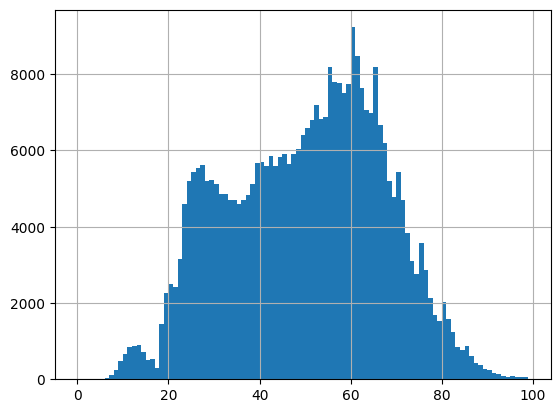

In [22]:
df_mean.age.hist(bins=range(0,100), log=False)


In [24]:
df_mean.shape

(347577, 9)

In [23]:
df_mean[df_mean.age < 10]

,name,age,gender,distance,unit,stroke_type,mean_final_time_s,std_final_time_s,number_of_swims
0,"0Schenck, Alan",6,Men,50.0,Yards,Backstroke,69.84,NaN,1
1,"0Schenck, Alan",6,Men,50.0,Yards,Breaststroke,70.84,NaN,1
2,"0Schenck, Alan",6,Men,50.0,Yards,Butterfly,54.39,NaN,1
3,"0Schenck, Alan",6,Men,50.0,Yards,Freestyle,43.63,NaN,1
4,"0Schenck, Alan",6,Men,100.0,Yards,Backstroke,145.43,NaN,1
...,...,...,...,...,...,...,...,...,...
344961,"Ziegenfus, Steban D",8,Men,50.0,Meters,Breaststroke,71.61,NaN,1
344962,"Ziegenfus, Steban D",8,Men,50.0,Meters,Freestyle,58.67,NaN,1
344963,"Ziegenfus, Steban D",8,Men,100.0,Meters,Backstroke,157.87,NaN,1
344964,"Ziegenfus, Steban D",8,Men,100.0,Meters,Breaststroke,160.00,NaN,1


In [25]:
df_mean[df_mean.name == 'Paoli, Davis M']

,name,age,gender,distance,unit,stroke_type,mean_final_time_s,std_final_time_s,number_of_swims
232142,"Paoli, Davis M",9,Women,50.0,Yards,Backstroke,44.60,NaN,1
232143,"Paoli, Davis M",9,Women,50.0,Yards,Freestyle,35.04,NaN,1
232144,"Paoli, Davis M",9,Women,100.0,Yards,Freestyle,77.86,NaN,1


In [26]:
df_mean[df_mean.name == 'Pereira, Gianna S']

,name,age,gender,distance,unit,stroke_type,mean_final_time_s,std_final_time_s,number_of_swims
236797,"Pereira, Gianna S",8,Women,50.0,Yards,Backstroke,46.27,NaN,1
236798,"Pereira, Gianna S",8,Women,50.0,Yards,Freestyle,40.58,NaN,1


In [27]:
df_mean[df_mean.name == 'Pereira, Gianna']

,name,age,gender,distance,unit,stroke_type,mean_final_time_s,std_final_time_s,number_of_swims


In [28]:
df_mean[df_mean.name == 'McSpadden, Brian']

,name,age,gender,distance,unit,stroke_type,mean_final_time_s,std_final_time_s,number_of_swims
203353,"McSpadden, Brian",59,Men,50.0,Yards,Breaststroke,38.12,NaN,1
203354,"McSpadden, Brian",59,Men,50.0,Yards,Freestyle,28.86,NaN,1
203355,"McSpadden, Brian",60,Men,50.0,Yards,Backstroke,37.54,NaN,1
203356,"McSpadden, Brian",60,Men,50.0,Yards,Breaststroke,38.08,NaN,1
203357,"McSpadden, Brian",60,Men,100.0,Yards,Freestyle,63.90,NaN,1


In [29]:
df_meet_list.head()

,date,course,lmsc,name,meet_id,meet_url,meet_uuid
0,"Aug 5, 2023",LCM,MD,Summer Splash 2023,20230805UMBC50L,https://www.usms.org/comp/meets/meet.php?MeetI...,4c7702e7-8dcc-4c6e-8902-0ca142dc68a5
1,"Aug 5, 2023",LCM,OR,2023 Oregon Masters LCM Association and NW Zon...,2023080523ORLCL,https://www.usms.org/comp/meets/meet.php?MeetI...,7b77d597-f267-45b1-8fe9-f31d3f9d3ced
2,"Aug 2-6, 2023",LCM,FL,2023 U.S. Masters Swimming Summer National Cha...,20230802SMRSRQL,https://www.usms.org/comp/meets/meet.php?MeetI...,df77d9de-79ec-4eb4-9b77-b4ea216391a3
3,"Jul 30, 2023",LCM,AR,Old School Spirit - Long Course Meters Meet (O...,20230730OSS23L,https://www.usms.org/comp/meets/meet.php?MeetI...,7681e289-206e-4068-ac46-25c93920b212
4,"Jul 29-30, 2023",LCM,KY,46th Annual Lakeside Masters Long Course Invit...,20230729LakInvL,https://www.usms.org/comp/meets/meet.php?MeetI...,0b5417c0-2c77-45ab-b409-9a23365c0588


In [30]:
df_meet_list[df_meet_list.meet_uuid == '5adca4ed-a34b-49a7-99ad-7aa8cedb35aa'].values

array([['Jul 31 - Aug 1, 2021', 'SCY', 'NE',
        '2021 Bay State Games Swimming', '20210731BAYG21Y',
        'https://www.usms.org/comp/meets/meet.php?MeetID=20210731BAYG21Y',
        '5adca4ed-a34b-49a7-99ad-7aa8cedb35aa']], dtype=object)

<Axes: >

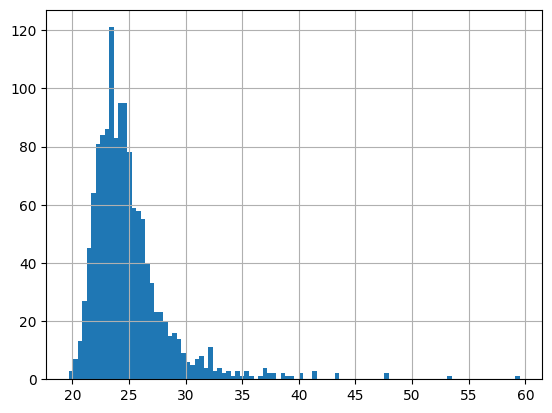

In [19]:
df_mean[(df_mean.gender == 'Men') & 
           (df_mean.age >= 25) & (df_mean.age < 30) &
           (df_mean.stroke_type == 'Freestyle') & 
           (df_mean.distance == 50.0) & 
           (df_mean.unit == 'Yards')].mean_final_time_s.hist(bins=100)

In [35]:
df_mean[(df_mean.gender == 'Men') & 
           (df_mean.age == 46) & 
           (df_mean.stroke_type == 'Freestyle') & 
           (df_mean.distance == 100.0) & 
           (df_mean.unit == 'Yards') & (df_mean.mean_final_time_s < 50)]

,name,age,gender,distance,unit,stroke_type,mean_final_time_s,std_final_time_s,number_of_swims
14492,"Barnes, Chuck",46,Men,100.0,Yards,Freestyle,47.61,NaN,1
68103,"Davis, Josh",46,Men,100.0,Yards,Freestyle,47.54,NaN,1
117539,"Gross, Jeremy",46,Men,100.0,Yards,Freestyle,49.16,1.322838,3


In [37]:
fast_guys = df_mean[(df_mean.gender == 'Men') & 
           (df_mean.age == 46) & 
           (df_mean.stroke_type == 'Freestyle') & 
           (df_mean.distance == 100.0) & 
           (df_mean.unit == 'Yards') & (df_mean.mean_final_time_s < 50)].name.values

In [41]:
df_results[df_results.name.isin(fast_guys)]

,name,age,event_name,club,seed_time,final_time,gender,stroke_type,distance,unit,meet_list_uuid,final_time_s
7911,"Gross, Jeremy",48,Men 45-49 50 Yard Freestyle Finals,SVY,23.00,22.92,Men,Freestyle,50.0,Yards,7226c5c3-53b0-434c-870e-f9e157b6283c,22.92
7912,"Gross, Jeremy",48,Men 45-49 100 Yard Freestyle Finals,SVY,51.50,51.32,Men,Freestyle,100.0,Yards,7226c5c3-53b0-434c-870e-f9e157b6283c,51.32
7913,"Gross, Jeremy",48,Men 45-49 50 Yard Butterfly Finals,SVY,24.50,24.83,Men,Butterfly,50.0,Yards,7226c5c3-53b0-434c-870e-f9e157b6283c,24.83
7914,"Gross, Jeremy",48,Men 45-49 100 Yard Individual Medley Finals,SVY,1:01.00,1:01.18,Men,Individual Medley,100.0,Yards,7226c5c3-53b0-434c-870e-f9e157b6283c,61.18
17843,"Gross, Jeremy",48,Men 45-49 25 Meter Freestyle Finals,SVY,12.15,11.72,Men,Freestyle,25.0,Meters,a038a708-f12a-482b-a71b-8482c4ad2d21,11.72
...,...,...,...,...,...,...,...,...,...,...,...,...
425004,"Barnes, Chuck",44,Men 40-44 50 Yard Freestyle Finals,NEM,20.99,21.56,Men,Freestyle,50.0,Yards,5cb7a036-9586-4b1a-9927-4d5cad2da0f6,21.56
425005,"Barnes, Chuck",44,Men 40-44 50 Yard Butterfly Finals,NEM,22.73,22.77,Men,Butterfly,50.0,Yards,5cb7a036-9586-4b1a-9927-4d5cad2da0f6,22.77
425006,"Barnes, Chuck",44,Men 40-44 100 Yard Butterfly Finals,NEM,51.00,51.18,Men,Butterfly,100.0,Yards,5cb7a036-9586-4b1a-9927-4d5cad2da0f6,51.18
431539,"Barnes, Chuck",44,Men 40-44 50 Yard Freestyle Finals,NEM,20.99,21.22,Men,Freestyle,50.0,Yards,07f55a67-17e4-42a7-be03-4505d29c11cc,21.22


In [42]:
df_meet_list[df_meet_list.meet_uuid == '7226c5c3-53b0-434c-870e-f9e157b6283c'].values

array([['Feb 2, 2020', 'SCY', 'DV',
        '3rd Annual Stephanie Walsh-Beilman Memorial SC Masters Meet',
        '20200202UMLYS2Y',
        'https://www.usms.org/comp/meets/meet.php?MeetID=20200202UMLYS2Y',
        '7226c5c3-53b0-434c-870e-f9e157b6283c']], dtype=object)

In [20]:
df_results[df_results.name == 'Gross, Jeremy']

,name,age,event_name,club,seed_time,final_time,gender,stroke_type,distance,unit,meet_list_uuid,final_time_s
7911,"Gross, Jeremy",48,Men 45-49 50 Yard Freestyle Finals,SVY,23.00,22.92,Men,Freestyle,50.0,Yards,7226c5c3-53b0-434c-870e-f9e157b6283c,22.92
7912,"Gross, Jeremy",48,Men 45-49 100 Yard Freestyle Finals,SVY,51.50,51.32,Men,Freestyle,100.0,Yards,7226c5c3-53b0-434c-870e-f9e157b6283c,51.32
7913,"Gross, Jeremy",48,Men 45-49 50 Yard Butterfly Finals,SVY,24.50,24.83,Men,Butterfly,50.0,Yards,7226c5c3-53b0-434c-870e-f9e157b6283c,24.83
7914,"Gross, Jeremy",48,Men 45-49 100 Yard Individual Medley Finals,SVY,1:01.00,1:01.18,Men,Individual Medley,100.0,Yards,7226c5c3-53b0-434c-870e-f9e157b6283c,61.18
17843,"Gross, Jeremy",48,Men 45-49 25 Meter Freestyle Finals,SVY,12.15,11.72,Men,Freestyle,25.0,Meters,a038a708-f12a-482b-a71b-8482c4ad2d21,11.72
...,...,...,...,...,...,...,...,...,...,...,...,...
400170,"Gross, Jeremy",50,Men 50-54 50 Meter Freestyle Finals,SVY,26.00,25.54,Men,Freestyle,50.0,Meters,f34a27af-56aa-4f92-90da-1233eac5f7ee,25.54
400171,"Gross, Jeremy",50,Men 50-54 50 Meter Backstroke Finals,SVY,33.50,32.76,Men,Backstroke,50.0,Meters,f34a27af-56aa-4f92-90da-1233eac5f7ee,32.76
400172,"Gross, Jeremy",50,Men 50-54 50 Meter Breaststroke Finals,SVY,35.50,35.48,Men,Breaststroke,50.0,Meters,f34a27af-56aa-4f92-90da-1233eac5f7ee,35.48
400173,"Gross, Jeremy",50,Men 50-54 50 Meter Butterfly Finals,SVY,27.70,27.97,Men,Butterfly,50.0,Meters,f34a27af-56aa-4f92-90da-1233eac5f7ee,27.97


In [27]:
df_results[df_results.name.str.contains('Cox') & df_results.name.str.contains('Gary')]

,name,age,event_name,club,seed_time,final_time,gender,stroke_type,distance,unit,meet_list_uuid,final_time_s
193161,"Cox, Gary A",40,Men 40-44 50 Yard Freestyle Finals,PSM,25.05,25.27,Men,Freestyle,50.0,Yards,9a40db1e-f2d6-407d-9d2c-fa2d1a2e6063,25.27
193162,"Cox, Gary A",40,Men 40-44 200 Yard Freestyle Finals,PSM,2:04.33,2:09.18,Men,Freestyle,200.0,Yards,9a40db1e-f2d6-407d-9d2c-fa2d1a2e6063,129.18
193163,"Cox, Gary A",40,Men 40-44 50 Yard Butterfly Finals,PSM,27.88,27.56,Men,Butterfly,50.0,Yards,9a40db1e-f2d6-407d-9d2c-fa2d1a2e6063,27.56
193164,"Cox, Gary A",40,Men 40-44 100 Yard Individual Medley Finals,PSM,1:04.67,1:03.62,Men,Individual Medley,100.0,Yards,9a40db1e-f2d6-407d-9d2c-fa2d1a2e6063,63.62


<Axes: >

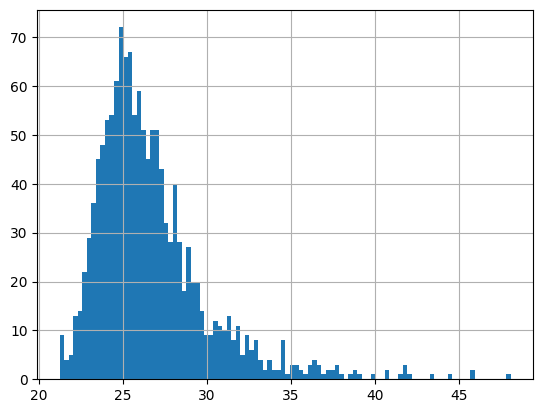

In [28]:
df_mean[(df_mean.gender == 'Men') & 
           (df_mean.age >= 40) & (df_mean.age < 45) &
           (df_mean.stroke_type == 'Freestyle') & 
           (df_mean.distance == 50.0) & 
           (df_mean.unit == 'Yards')].mean_final_time_s.hist(bins=100)

<Axes: >

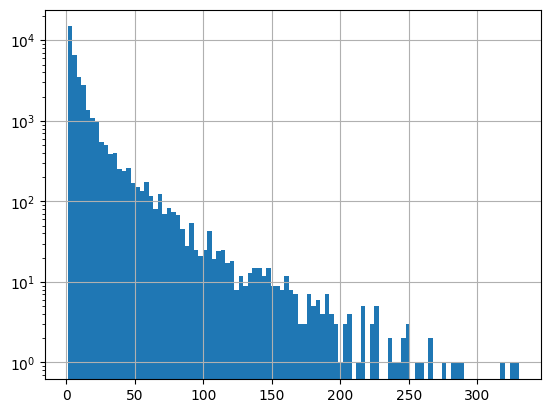

In [36]:
df_results.groupby('name').age.count()break.hist(bins=100, log=True)

In [38]:
df_results.groupby('name').age.count().sort_values(ascending=False).head(100)

name
Stickle, Christopher C    330
Burbank, Gerald O         326
Dussliere, Julie F        317
Noyes, Penny P            289
Weiderman, Jennifer       287
                         ... 
Duong, William M          163
Frees, Heather M          163
Phillips, Mike            163
Hug, Laurie               163
Fort, Robert L            162
Name: age, Length: 100, dtype: int64

In [39]:
df_results[df_results.name == 'Stickle, Christopher C']

,name,age,event_name,club,seed_time,final_time,gender,stroke_type,distance,unit,meet_list_uuid,final_time_s
2126,"Stickle, Christopher C",30,Men 30-34 200 Meter Freestyle Finals,GOLD,2:14.85,2:16.60,Men,Freestyle,200.0,Meters,54bf1901-5d05-4864-bc01-9fefc2fe3b9e,136.60
2127,"Stickle, Christopher C",30,Men 30-34 400 Meter Freestyle Finals,GOLD,4:45.96,4:45.60,Men,Freestyle,400.0,Meters,54bf1901-5d05-4864-bc01-9fefc2fe3b9e,285.60
2128,"Stickle, Christopher C",30,Men 30-34 800 Meter Freestyle Finals,GOLD,9:52.85,9:50.73,Men,Freestyle,800.0,Meters,54bf1901-5d05-4864-bc01-9fefc2fe3b9e,590.73
2129,"Stickle, Christopher C",30,Men 30-34 1500 Meter Freestyle Finals,GOLD,19:17.29,19:25.01,Men,Freestyle,1500.0,Meters,54bf1901-5d05-4864-bc01-9fefc2fe3b9e,1165.01
2130,"Stickle, Christopher C",30,Men 30-34 200 Meter Backstroke Finals,GOLD,2:38.05,2:33.72,Men,Backstroke,200.0,Meters,54bf1901-5d05-4864-bc01-9fefc2fe3b9e,153.72
...,...,...,...,...,...,...,...,...,...,...,...,...
435582,"Stickle, Christopher C",30,Men 30-34 400 Yard Individual Medley Finals,SPM,5:05.34,4:48.52,Men,Individual Medley,400.0,Yards,dbeeee9b-eafb-4f22-be1d-82c8bfd8099f,288.52
438041,"Stickle, Christopher C",30,Men 30-34 50 Yard Freestyle Finals,SPM,24.65,25.23,Men,Freestyle,50.0,Yards,d0680869-6465-424b-b845-16661a690f9c,25.23
438042,"Stickle, Christopher C",30,Men 30-34 100 Yard Freestyle Finals,SPM,53.97,53.38,Men,Freestyle,100.0,Yards,d0680869-6465-424b-b845-16661a690f9c,53.38
438043,"Stickle, Christopher C",30,Men 30-34 200 Yard Freestyle Finals,SPM,1:57.72,1:56.90,Men,Freestyle,200.0,Yards,d0680869-6465-424b-b845-16661a690f9c,116.90


In [58]:
df_results[df_results.name == 'Stickle, Christopher C'].groupby(['stroke_type', 'distance']).count()


name  age  event_name  club  seed_time  \
stroke_type       distance                                           
Backstroke        25.0         2    2           2     2          2   
                  50.0        19   19          19    19         19   
                  100.0       19   19          19    19         19   
                  200.0       20   20          20    20         20   
Breaststroke      25.0         2    2           2     2          2   
                  50.0        10   10          10    10         10   
                  100.0        9    9           9     9          9   
                  200.0       10   10          10    10         10   
Butterfly         25.0         2    2           2     2          2   
                  50.0        22   22          22    22         22   
                  100.0       22   22          22    22         22   
                  200.0       20   20          20    20         20   
Freestyle         25.0         1    1           1     1          1   
                  50.0        19   19          19    19         19   
                  100.0       18   18          18    18         18   
                  200.0       24   24          24    24         24   
                  400.0       16   16          16    16         16   
                  500.0       15   15          15    15         15   
                  800.0       14   14          14    14         14   
                  1000.0       9    9           9     9          9   
                  1500.0       9    9           9     9          9   
                  1650.0       8    8           8     8          8   
Individual Medley 100.0        7    7           7     7          7   
                  200.0       14   14          14    14         14   
                  400.0       19   19          19    19         19   

                            final_time  gender  unit  meet_list_uuid  \
stroke_type       distance                                             
Backstroke        25.0               2       2     2               2   
                  50.0              19      19    19              19   
                  100.0             19      19    19              19   
                  200.0             20      20    20              20   
Breaststroke      25.0               2       2     2               2   
                  50.0              10      10    10              10   
                  100.0              9       9     9               9   
                  200.0             10      10    10              10   
Butterfly         25.0               2       2     2               2   
                  50.0              22      22    22              22   
                  100.0             22      22    22              22   
                  200.0             20      20    20              20   
Freestyle         25.0               1       1     1               1   
                  50.0              19      19    19              19   
                  100.0             18      18    18              18   
                  200.0             24      24    24              24   
                  400.0             16      16    16              16   
                  500.0             15      15    15              15   
                  800.0             14      14    14              14   
                  1000.0             9       9     9               9   
                  1500.0             9       9     9               9   
                  1650.0             8       8     8               8   
Individual Medley 100.0              7       7     7               7   
                  200.0             14      14    14              14   
                  400.0             19      19    19              19   

                            final_time_s  
stroke_type       distance                
Backstroke        25.0                 2  
                  50.0                19  
                  10

In [41]:
df_results[df_results.name == 'Stickle, Christopher C'].age.unique()

array([30, 29, 28, 33, 32, 31])

In [60]:
df_results[(df_results.name == 'Stickle, Christopher C') &
           (df_results.distance == 25.0)].sort_values('age')

,name,age,event_name,club,seed_time,final_time,gender,stroke_type,distance,unit,meet_list_uuid,final_time_s
413815,"Stickle, Christopher C",31,Men 30-34 25 Meter Backstroke Finals,SPM,15.00,15.80,Men,Backstroke,25.0,Meters,a840f87f-b00b-489d-bedc-13c53644ff04,15.80
413819,"Stickle, Christopher C",31,Men 30-34 25 Meter Breaststroke Finals,SPM,17.00,16.77,Men,Breaststroke,25.0,Meters,a840f87f-b00b-489d-bedc-13c53644ff04,16.77
413820,"Stickle, Christopher C",31,Men 30-34 25 Meter Butterfly Finals,SPM,13.00,13.52,Men,Butterfly,25.0,Meters,a840f87f-b00b-489d-bedc-13c53644ff04,13.52
331028,"Stickle, Christopher C",32,Men 30-34 25 Meter Freestyle Finals,SPM,13.50,12.32,Men,Freestyle,25.0,Meters,63fe2d59-f8e6-4f59-a0cd-e13392c3fe2d,12.32
331033,"Stickle, Christopher C",32,Men 30-34 25 Meter Backstroke Finals,SPM,15.80,14.56,Men,Backstroke,25.0,Meters,63fe2d59-f8e6-4f59-a0cd-e13392c3fe2d,14.56
331037,"Stickle, Christopher C",32,Men 30-34 25 Meter Breaststroke Finals,SPM,16.77,15.48,Men,Breaststroke,25.0,Meters,63fe2d59-f8e6-4f59-a0cd-e13392c3fe2d,15.48
331038,"Stickle, Christopher C",32,Men 30-34 25 Meter Butterfly Finals,SPM,13.52,13.60,Men,Butterfly,25.0,Meters,63fe2d59-f8e6-4f59-a0cd-e13392c3fe2d,13.60


In [52]:
df_results[(df_results.name == 'Stickle, Christopher C') &
           (df_results.distance == 100.0) & 
           (df_results.stroke_type == 'Freestyle') & 
              (df_results.unit == 'Yards')].sort_values('age')

,name,age,event_name,club,seed_time,final_time,gender,stroke_type,distance,unit,meet_list_uuid,final_time_s
87850,"Stickle, Christopher C",28,Men 25-29 100 Yard Freestyle Finals,GOLD,54.48,54.92,Men,Freestyle,100.0,Yards,46263716-5c6a-49c9-ad59-2b0af5467074,54.92
99216,"Stickle, Christopher C",28,Men 25-29 100 Yard Freestyle Finals,GOLD,55.21,55.32,Men,Freestyle,100.0,Yards,ee1e2247-8c15-4027-abd5-4e70147f3492,55.32
109867,"Stickle, Christopher C",28,Men 25-29 100 Yard Freestyle Finals,GOLD,55.21,54.48,Men,Freestyle,100.0,Yards,e07788c2-4658-45b1-8c95-c7f630238ae9,54.48
118550,"Stickle, Christopher C",28,Men 25-29 100 Yard Freestyle Finals,GOLD,58.00,55.21,Men,Freestyle,100.0,Yards,2195fe59-218a-4384-9d58-8b6f1afe35ac,55.21
167354,"Stickle, Christopher C",28,Men 25-29 100 Yard Freestyle Finals,GOLD,56.00,1:02.02,Men,Freestyle,100.0,Yards,e8d488b6-4919-465d-be90-5c2b0acbfbe4,62.02
14186,"Stickle, Christopher C",29,Men 25-29 100 Yard Freestyle Finals,GOLD,54.48,53.97,Men,Freestyle,100.0,Yards,1cd4ad19-1df2-4b6d-b7b6-7f3a03dde54f,53.97
438042,"Stickle, Christopher C",30,Men 30-34 100 Yard Freestyle Finals,SPM,53.97,53.38,Men,Freestyle,100.0,Yards,d0680869-6465-424b-b845-16661a690f9c,53.38
385560,"Stickle, Christopher C",31,Men 30-34 100 Yard Freestyle Finals,SPM,53.38,52.51,Men,Freestyle,100.0,Yards,35495cfe-02eb-4a0e-8855-10cb79ac4444,52.51
293922,"Stickle, Christopher C",32,Men 30-34 100 Yard Freestyle Finals,SPM,51.86,56.06,Men,Freestyle,100.0,Yards,c0e2e542-752c-4dbc-9088-1dcde1ee8f00,56.06
301549,"Stickle, Christopher C",32,Men 30-34 100 Yard Freestyle Finals,SPM,52.51,51.86,Men,Freestyle,100.0,Yards,db394833-a434-4bff-afef-ba171bb72254,51.86


In [56]:
df_meet_list[df_meet_list.meet_uuid == 'db394833-a434-4bff-afef-ba171bb72254'].values

array([['Feb 18-19, 2023', 'SCY', 'FG',
        '27th Annual Fort Lauderdale Masters Challenge',
        '20230218sFLA23Y',
        'https://www.usms.org/comp/meets/meet.php?MeetID=20230218sFLA23Y',
        'db394833-a434-4bff-afef-ba171bb72254']], dtype=object)

In [54]:
df_results[df_results.name == 'Stickle, Christopher C'].groupby('age').count()

,name,event_name,club,seed_time,final_time,gender,stroke_type,distance,unit,meet_list_uuid,final_time_s
age,,,,,,,,,,,
28,52,52,52,52,52,52,52,52,52,52,52
29,32,32,32,32,32,32,32,32,32,32,32
30,22,22,22,22,22,22,22,22,22,22,22
31,93,93,93,93,93,93,93,93,93,93,93
32,104,104,104,104,104,104,104,104,104,104,104
33,27,27,27,27,27,27,27,27,27,27,27


In [61]:
df_results[df_results.name == 'Fort, Robert L'].groupby('age').count()

,name,event_name,club,seed_time,final_time,gender,stroke_type,distance,unit,meet_list_uuid,final_time_s
age,,,,,,,,,,,
59,5,5,5,5,5,5,5,5,5,5,5
60,24,24,24,24,24,24,24,24,24,24,24
61,47,47,47,47,47,47,47,47,47,47,47
63,23,23,23,23,23,23,23,23,23,23,23
64,48,48,48,48,48,48,48,48,48,48,48
65,15,15,15,15,15,15,15,15,15,15,15
